In [1]:
import pandas as pd
import matplotlib.pyplot as plt


In [2]:
df=pd.read_csv(r"C:\Users\ADMIN\Desktop\CSV FILES\Africa_climate_change.csv")
print(df)

                   DATE  PRCP  TAVG  TMAX  TMIN   COUNTRY
0       19800101 000000   NaN  54.0  61.0  43.0   Tunisia
1       19800101 000000   NaN  49.0  55.0  41.0   Tunisia
2       19800101 000000   0.0  72.0  86.0  59.0  Cameroon
3       19800101 000000   NaN  50.0  55.0  43.0   Tunisia
4       19800101 000000   NaN  75.0  91.0   NaN  Cameroon
...                 ...   ...   ...   ...   ...       ...
464810  20230823 000000   NaN  85.0  89.0   NaN   Senegal
464811  20230823 000000   NaN  80.0  90.0  72.0     Egypt
464812  20230823 000000   NaN  87.0   NaN  73.0     Egypt
464813  20230823 000000   0.0  82.0  94.0   NaN   Senegal
464814  20230823 000000   NaN  83.0   NaN   NaN  Cameroon

[464815 rows x 6 columns]


In [3]:
# highest average temperature (TAVG), lowest minimum temperature (TMIN) , maximum and minimum temperatures recorded (TMAX and TMIN)
#,(precipitation (PRCP) correlate with the average temperature)
# Convert PRCP to numeric, replacing non-numeric with 0
df['PRCP'] = pd.to_numeric(df['PRCP'], errors='coerce').fillna(0).astype(int)

# Convert TMIN to numeric, replacing non-numeric with NaN
df['TMIN'] = pd.to_numeric(df['TMIN'], errors='coerce')

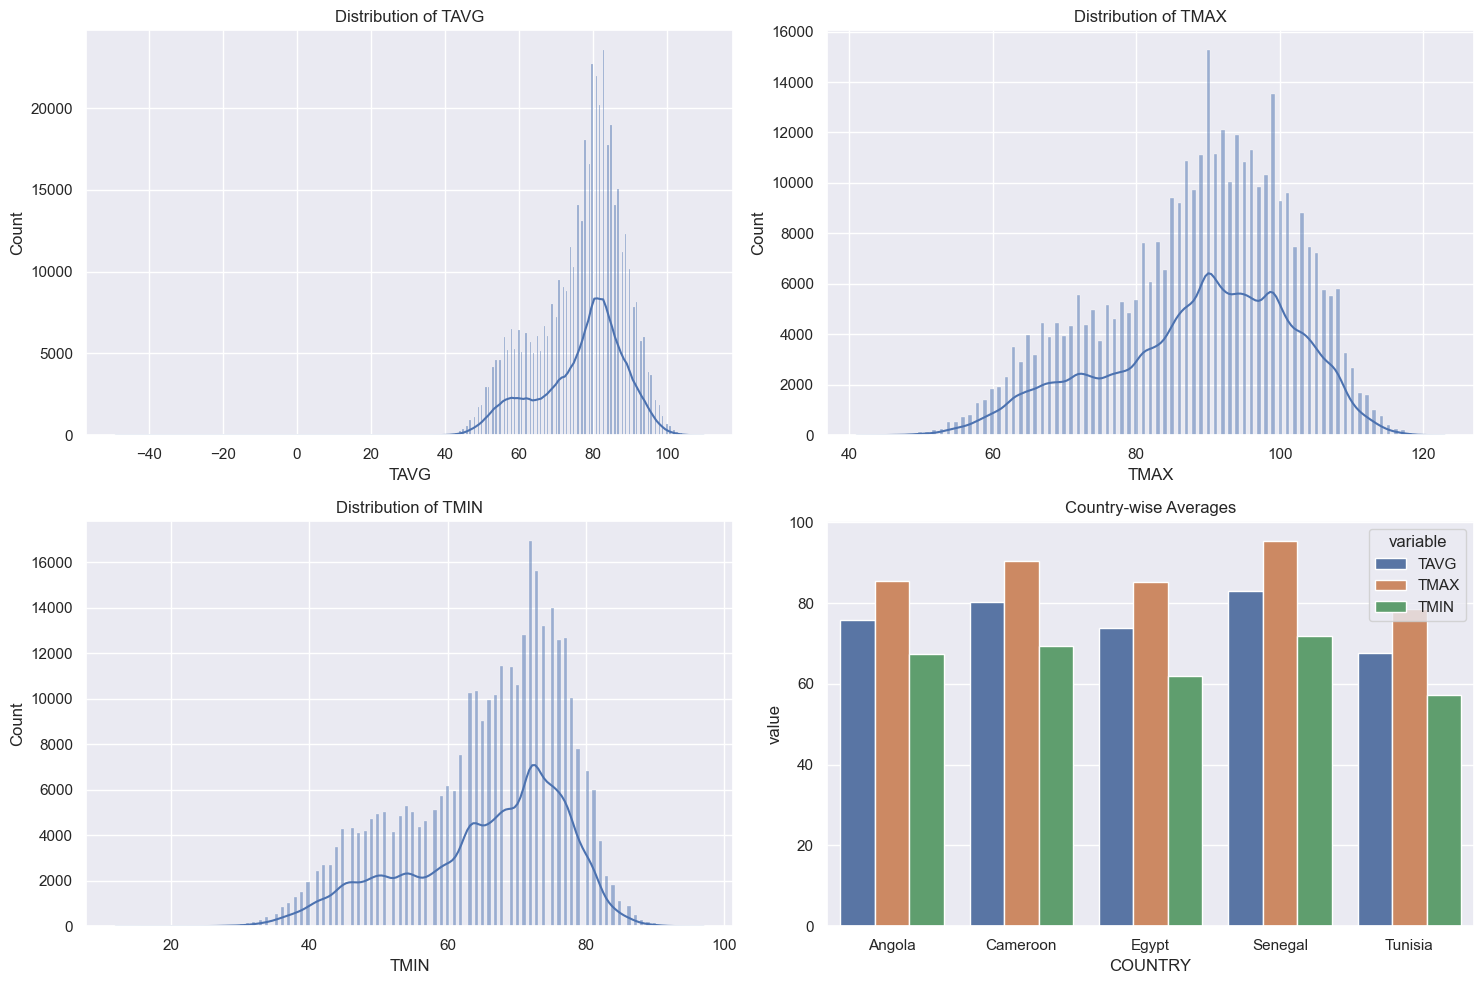

In [6]:

import seaborn as sns
# Set the style for seaborn
sns.set(style="darkgrid")

# Create a figure with subplots
fig, axes = plt.subplots(2, 2, figsize=(15, 10))

# Distribution of TAVG, TMAX, and TMIN
sns.histplot(df['TAVG'], kde=True, ax=axes[0][0]).set_title('Distribution of TAVG')
sns.histplot(df['TMAX'], kde=True, ax=axes[0][1]).set_title('Distribution of TMAX')
sns.histplot(df['TMIN'].dropna(), kde=True, ax=axes[1][0]).set_title('Distribution of TMIN')
# Country-wise average TAVG, TMAX, and TMIN
country_avg = df.groupby('COUNTRY')[['TAVG', 'TMAX', 'TMIN']].mean().reset_index()
country_avg = pd.melt(country_avg, id_vars=['COUNTRY'], value_vars=['TAVG', 'TMAX', 'TMIN'])
sns.barplot(data=country_avg, x='COUNTRY', y='value', hue='variable', ax=axes[1][1]).set_title('Country-wise Averages')

# Adjust layout
plt.tight_layout()
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
# Show plots
plt.show()